In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

from scipy.stats import skew,norm

from sklearn.preprocessing import LabelEncoder

#Importing modelling libraries

from sklearn.linear_model import Lasso
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone

In [2]:
#Train Dataset

train = pd.read_csv("train.csv")
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [3]:
#Test Dataset

test = pd.read_csv("test.csv")
test.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [4]:
#save the ID column
train_ID = train['Id']
test_ID = test['Id']

#Drop the ID column since it is unnecessary for the prediction process
train.drop("Id",axis =1,inplace = True)
test.drop("Id",axis =1,inplace= True)

In [5]:
#SalesPrice Summary for train data

train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:>

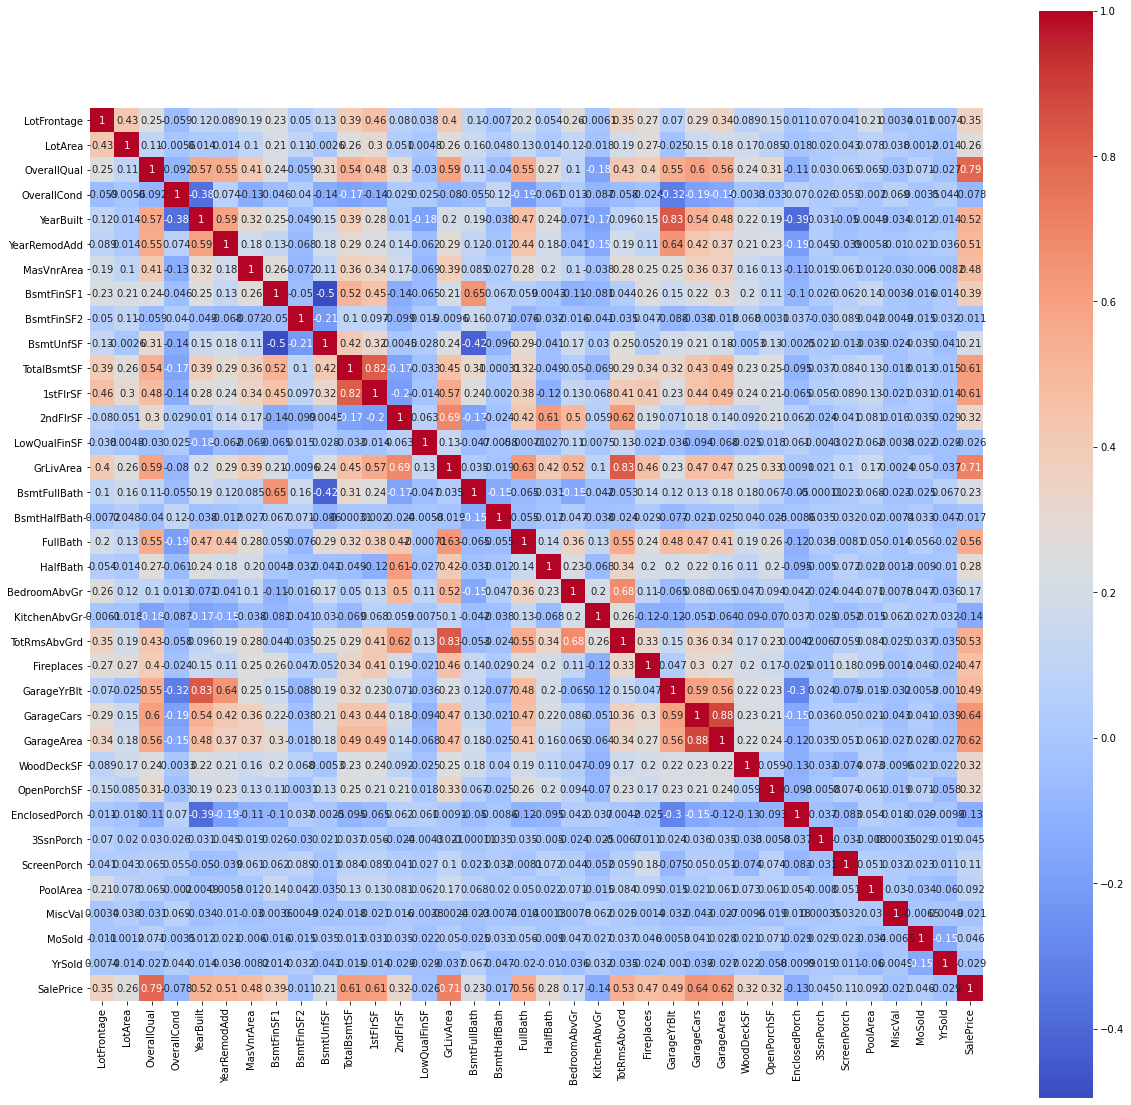

In [6]:
#Correlation between variables in train dataset

corr = train.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, vmax=1, square=True, cmap="coolwarm", annot=True)

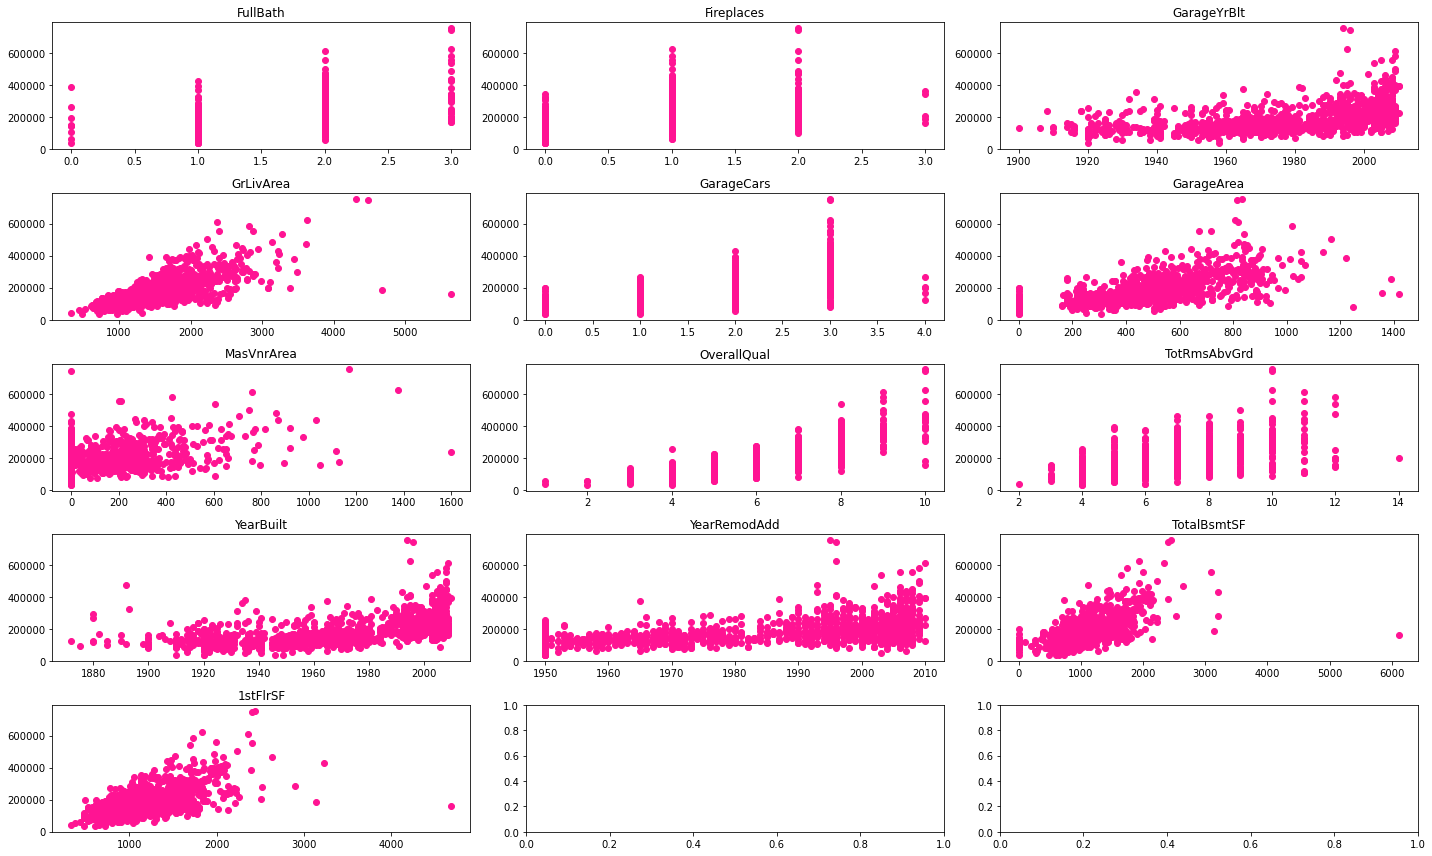

In [7]:
#Scatterplot for SalesPrice against variables with correlation > .45

f, ax = plt.subplots(5, 3, figsize=(20, 12))
price = train['SalePrice']
corr_variables = ['FullBath','Fireplaces','GarageYrBlt','GrLivArea','GarageCars','GarageArea','MasVnrArea','OverallQual','TotRmsAbvGrd','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF']
i=0
j=0
for cvar in corr_variables:
    ax[i, j].scatter(train[cvar], price, color='deeppink')
    ax[i, j].set_title(cvar)
    if j==2:
        i+=1
        j=0
    else:
        j+=1
plt.tight_layout()

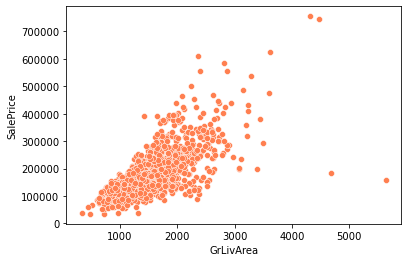

In [8]:
#Handling Outliers (GrLivArea - SalesPrice)
#https://www.kaggle.com/c/house-prices-advanced-regression-techniques/discussion/23919
#Greater Living Area is high and SalesPrice is very low. This can't be true

#Scatterplot of GrLivArea and SalesPrice
sns.scatterplot(x="GrLivArea", y="SalePrice", data=train, color = 'coral')

#Removing the outtliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

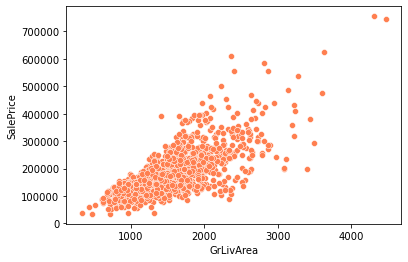

In [9]:
#Scatterplot of GrLivArea and SalesPrice after ouliers were removed
sns.scatterplot(x="GrLivArea", y="SalePrice", data=train, color = 'coral')


In [10]:
#SalesPrice
train["SalePrice"].describe()

count      1458.000000
mean     180932.919067
std       79495.055285
min       34900.000000
25%      129925.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/Users/mitalijulka/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

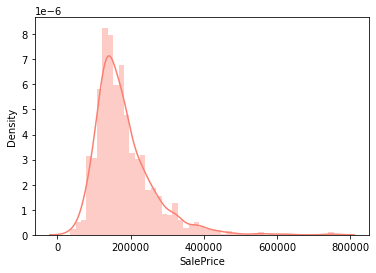

In [11]:
#histogram of SalesPrice
sns.distplot(train["SalePrice"], color='salmon')

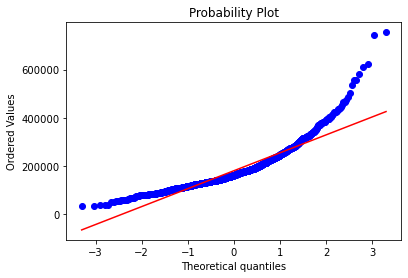

Skewness: 1.881296
Kurtosis: 6.523067


In [12]:
#Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice']);
#QQ plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train ['SalePrice'].kurt())

In [13]:
#This implies it is not normally distributed

/Users/mitalijulka/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 0.121580
Kurtosis: 0.804751


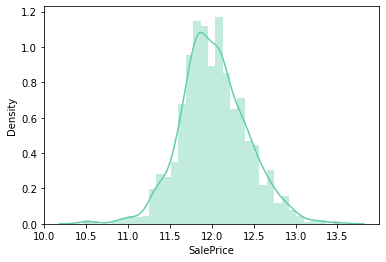

In [14]:
#Performing log transformation on SalesPrice

train["SalePrice"] = np.log1p(train["SalePrice"])
sns.distplot(train["SalePrice"], color='mediumaquamarine')

print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train ['SalePrice'].kurt())

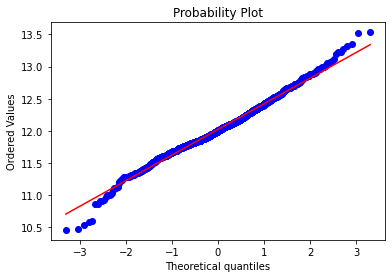

skewness: 0.121580
kurtosis: 0.804751


In [15]:
#Get the fitted parameters used by the function
(mu,sigma)= norm.fit(train['SalePrice']);
#QQ plot
fig =plt.figure()
res =stats. probplot(train['SalePrice'], plot=plt)
plt.show()
print("skewness: %f" % train['SalePrice'].skew())
print("kurtosis: %f" % train ['SalePrice'].kurt())

In [16]:
#Finding missing values in train + test data

tt = pd.concat((train.loc[:, 'MSSubClass': 'SaleCondition'],
                     test.loc[:,'MSSubClass':'SaleCondition']))
print("Train + Test data: {} ".format(tt.shape))

##Trian + Test null values:

missing = pd.DataFrame({'Missing Values':tt.isnull().sum()})
missing[missing["Missing Values"]!=0]
missing.sort_values(by=['Missing Values'], inplace=True, ascending=False)
missing.head(50)

Train + Test data: (2917, 79) 


,Missing Values
PoolQC,2908
MiscFeature,2812
Alley,2719
Fence,2346
FireplaceQu,1420
LotFrontage,486
GarageYrBlt,159
GarageFinish,159
GarageQual,159
GarageCond,159


In [17]:
#Dropping columns with most missing values >2000

garbage_cols = list(missing[missing['Missing Values']>2000].index)

for cols in tt.columns:
    if len(tt[cols].unique())==1 or len(tt[cols].unique())==tt.shape[0]:
        garbage_cols.append(cols)
garbage_cols

['PoolQC', 'MiscFeature', 'Alley', 'Fence']

In [18]:
tt.drop(columns = garbage_cols, inplace = True)

In [19]:
#shape of the tt dataset
print('Shape of Test + Train (tt dataset): {}'.format(tt.shape))

Shape of Test + Train (tt dataset): (2917, 75)


In [20]:
#Impute missing values

for colm in ('FireplaceQu','GarageFinish','GarageQual','GarageCond','GarageType','MasVnrType','MSSubClass'):
    tt[colm] = tt[colm].fillna('None')

In [21]:
##Trian + Test null values:

missing = pd.DataFrame({'Missing Values':tt.isnull().sum()})
missing[missing["Missing Values"]!=0]
missing.sort_values(by=['Missing Values'], inplace=True, ascending=False)
missing.head(30)

,Missing Values
LotFrontage,486
GarageYrBlt,159
BsmtExposure,82
BsmtCond,82
BsmtQual,81
BsmtFinType2,80
BsmtFinType1,79
MasVnrArea,23
MSZoning,4
Functional,2


In [22]:
#shape of the tt dataset
print('Shape of Test + Train (tt dataset): {}'.format(tt.shape))

Shape of Test + Train (tt dataset): (2917, 75)


In [23]:
#Replacing missing value in Garage columns with 0
#no garage means no cars in such garage

for colm in ('GarageYrBlt','GarageArea', 'GarageCars'):
    tt[colm] = tt[colm].fillna(0)

In [24]:
#missing values for no basement 
#no basement means no basement bathroom

for colm in ('BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF','BsmtFullBath',
            'BsmtHalfBath'):
    tt[colm] = tt[colm].fillna(0)

In [25]:
#Masonry veneer area in square feet
tt["MasVnrArea"] = tt["MasVnrArea"].fillna(0)

In [26]:
#Basement features with value NaN means that there is no basement 
for colm in ('BsmtQual', 'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2'):
    tt[colm] = tt[colm].fillna('None')

In [27]:
#Group LotFrontage 
#fill missing value with median Lotfrontage of neighboorhoods
tt["LotFrontage"] = tt.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [28]:
#Finding missing values agian

missing = pd.DataFrame({'Missing Values':tt.isnull().sum()})
missing[missing["Missing Values"]!=0]
missing.sort_values(by=['Missing Values'], inplace=True, ascending=False)
missing.head(10)

,Missing Values
MSZoning,4
Utilities,2
Functional,2
Exterior2nd,1
SaleType,1
Electrical,1
Exterior1st,1
KitchenQual,1
KitchenAbvGr,0
FireplaceQu,0


In [29]:
#Adjusting remaining missing values

#Analysing the categorical data to find top values

categorical_data = tt.select_dtypes(exclude=[np.number])
categorical_data.describe(include='all')

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,2913,2917,2917,2917,2915,2917,2917,2917,2917,2917,...,2916,2915,2917,2917,2917,2917,2917,2917,2916,2917
unique,5,2,4,4,2,5,3,25,9,8,...,4,7,6,7,4,6,6,3,9,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,TA,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
freq,2263,2905,1859,2622,2914,2132,2776,443,2511,2888,...,1492,2715,1420,1722,1230,2602,2652,2639,2525,2402


In [30]:
#Filling null values with mode value

#MSZoning: Identifies the general zoning classification of the sale.
#'RL' is top value

tt['MSZoning'] = tt['MSZoning'].fillna(tt['MSZoning'].mode()[0])

#Functional
tt["Functional"] = tt["Functional"].fillna(tt['Electrical'].mode()[0])

#Electrical
tt['Electrical'] = tt['Electrical'].fillna(tt['Electrical'].mode()[0])

#KitchenQual
tt['KitchenQual'] = tt['KitchenQual'].fillna(tt['KitchenQual'].mode()[0])

#Extrerior 1st 
tt['Exterior1st'] = tt['Exterior1st'].fillna(tt['Exterior1st'].mode()[0])

#Exterior 2nd
tt['Exterior2nd'] = tt['Exterior2nd'].fillna(tt['Exterior2nd'].mode()[0])

#sale type
tt['SaleType'] = tt['SaleType'].fillna(tt['SaleType'].mode()[0])

#Finding missing values

missing = pd.DataFrame({'Missing Values':tt.isnull().sum()})
missing[missing["Missing Values"]!=0]
missing.sort_values(by=['Missing Values'], inplace=True, ascending=False)
missing.head(10)

,Missing Values
Utilities,2
MSSubClass,0
FullBath,0
Fireplaces,0
Functional,0
TotRmsAbvGrd,0
KitchenQual,0
KitchenAbvGr,0
BedroomAbvGr,0
HalfBath,0


<AxesSubplot:>

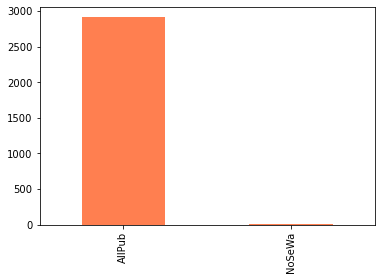

In [31]:
#Analyze Utilities
tt['Utilities'].value_counts().plot(kind='bar', color='coral')

In [32]:
#Most values in 'Utilities' are same
#It is thereofore safe to drop the column

tt = tt.drop(['Utilities'], axis=1)

missing = pd.DataFrame({'Missing Values':tt.isnull().sum()})
missing[missing["Missing Values"]!=0]
missing.sort_values(by=['Missing Values'], inplace=True, ascending=False)
missing.head(10)

,Missing Values
MSSubClass,0
GarageType,0
Fireplaces,0
Functional,0
TotRmsAbvGrd,0
KitchenQual,0
KitchenAbvGr,0
BedroomAbvGr,0
HalfBath,0
FullBath,0


In [33]:
#Transforming required numerical features to categorical 

tt['MSSubClass'] = tt['MSSubClass'].apply(str)
tt['OverallCond'] = tt['OverallCond'].astype(str)
tt['YrSold'] = tt['YrSold'].astype(str)
tt['MoSold'] = tt['MoSold'].astype(str)

In [34]:
#Label Encoding some categorical variables
#for information in their ordering set

cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

#applying LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(tt[c].values))
    tt[c] = lbl.transform(list(tt[c].values))

#shape of the tt dataset
print('Shape of Test + Train (tt dataset): {}'.format(tt.shape))

Shape of Test + Train (tt dataset): (2917, 74)


In [35]:
#Adding total surface area 
#TotalSf = basement + firstflr + secondflr

tt['TotalSF'] = tt['TotalBsmtSF'] + tt['1stFlrSF'] + tt['2ndFlrSF']

#Dropping other surface area features
#tt = tt.drop(['TotalBsmtSF','1stFlrSF','2ndFlrSF'], axis=1)

#shape of the tt dataset
print('Shape of Test + Train (tt dataset): {}'.format(tt.shape))

Shape of Test + Train (tt dataset): (2917, 75)


In [36]:
#Log transformation of highly skewed numeric columns 
numeric_columns = tt.dtypes[tt.dtypes != "object"].index

skewed_columns = tt[numeric_columns].apply(lambda x : skew (x.dropna())).sort_values(ascending=False)
print ("Skewwness in numerical columns: \n")
skewness = pd.DataFrame({'Skewess' :skewed_columns})   
skewness.head(7)

Skewwness in numerical columns: 



,Skewess
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550


In [37]:
tt = pd.get_dummies(tt)

#shape of the tt dataset
print('Shape of Test + Train (tt dataset): {}'.format(tt.shape))

Shape of Test + Train (tt dataset): (2917, 212)


In [38]:
#Splitting data for modelling

tt_train = train.shape[0]
tt_test = test.shape[0]
sp_train= train.SalePrice.values
train = pd.DataFrame(tt[:tt_train])
test = pd.DataFrame(tt[tt_train:])

In [39]:
#Validation function
#https://stackoverflow.com/questions/61429722/unsure-about-the-purpose-of-get-n-splits-and-why-it-is-necessary

n_folds = 5

def RMSLE_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values,sp_train, scoring="neg_mean_squared_error",
    cv = kf))
    return(rmse)

In [40]:
#Regression 
#influenced by:
#https://github.com/akshaykumarvikram/kaggle-advanced-regression-algos

#Lasso Regression
lasso = make_pipeline(RobustScaler(), Lasso(alpha = 0.0005, random_state = 1))

#from sklearn.kernel_ridge import KernelRidge
#Ridge Regression
#KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

#Gradient Boosting Regression
GBoost = GradientBoostingRegressor(loss='huber', learning_rate=0.05, n_estimators=3000,
         min_samples_split=10, min_samples_leaf=15,max_depth=4, random_state=5,max_features='sqrt')

In [41]:
#Lasso Score
score = RMSLE_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})".format(score.mean(),score.std()))

#Ridge Score
#score = RMSLE_cv(KRR)
#print("\nKernel Ridge score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

#Gradient Boosting Regression
score = RMSLE_cv(GBoost)
print("\nGBoost score: {:.4f} ({:.4f})".format(score.mean(),score.std()))


Lasso score: 0.1124 (0.0067)

GBoost score: 0.1161 (0.0077)


In [42]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   


    
# Averaged base models score

averaged_base_models = AveragingModels(models = (lasso, GBoost))

score = RMSLE_cv(averaged_base_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1088 (0.0071)



In [43]:
#defining RMSLE evaluation function
def RMSLE (y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [44]:
#final training and prediction of the stacked regressor

averaged_base_models.fit(train.values, sp_train) 
stacked_train_pred = averaged_base_models.predict(train.values)
stacked_pred = np.expm1(averaged_base_models.predict(test.values))
print("RMSLE score on the train data:") 
print(RMSLE(sp_train,stacked_train_pred))
print("Accuracy score:") 
averaged_base_models.score(train.values, sp_train)

RMSLE score on the train data:
0.06969480092545195
Accuracy score:


0.9695769630937836

In [45]:
ensemble = stacked_pred *1
submit = pd.DataFrame()
submit['id'] = test_ID
submit['SalePrice'] = ensemble
submit.to_csv('final.csv', index = False)
submit.head()

,id,SalePrice
0,1461,123561.760172
1,1462,155515.068759
2,1463,183921.395830
3,1464,198760.394697
4,1465,187571.943799
